In [35]:
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_csv('titanic.csv', delimiter = ";")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [36]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
df.shape

(891, 12)

In [38]:
df = df.drop(['Cabin'],axis=1)

In [39]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [40]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [41]:
df['Embarked'].fillna( 'S' ,inplace= True)

In [42]:
df=df.drop(['PassengerId'],axis=1)

In [43]:
df['Survived'].value_counts()

No     549
Yes    342
Name: Survived, dtype: int64

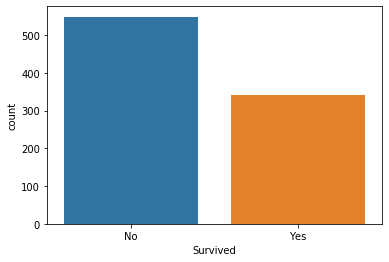

In [44]:
import seaborn as sns
sns.countplot(df['Survived'])

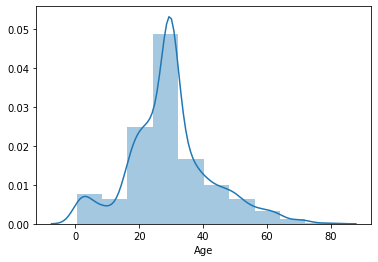

In [45]:
sns.distplot(df['Age'],bins=10)

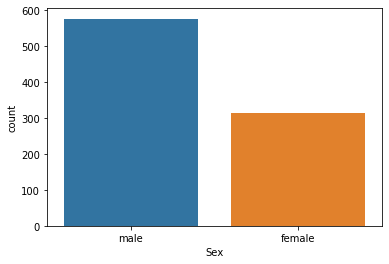

In [46]:
sns.countplot(df['Sex'])

In [47]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

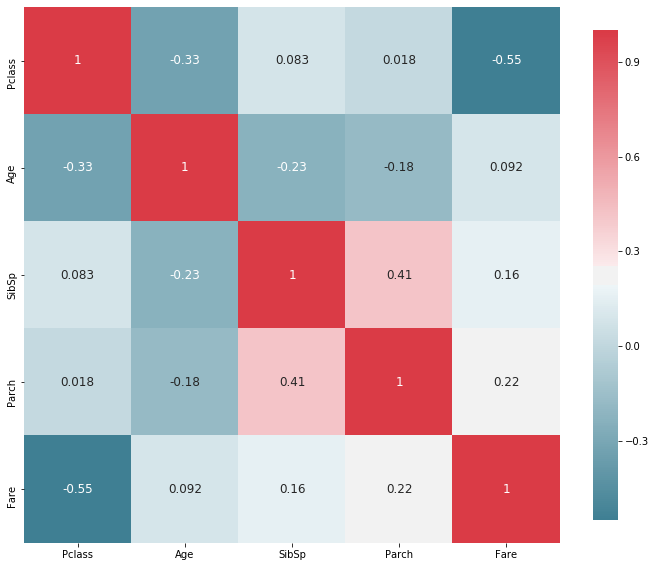

In [48]:
plot_correlation_map( df )

In [49]:
df.groupby(['Pclass','Sex']).mean()

Age     SibSp     Parch        Fare
Pclass Sex                                              
1      female  34.141405  0.553191  0.457447  106.125798
       male    39.287717  0.311475  0.278689   67.226127
2      female  28.748661  0.486842  0.605263   21.970121
       male    30.653908  0.342593  0.222222   19.741782
3      female  24.068493  0.895833  0.798611   16.118810
       male    27.372153  0.498559  0.224784   12.661633

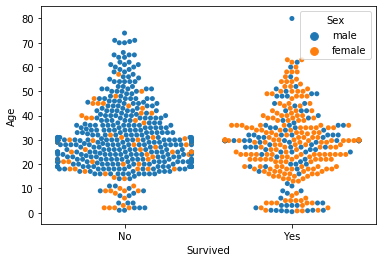

In [50]:
sns.swarmplot(x=df['Survived'],y=df['Age'],hue=df['Sex'])

In [51]:
l= df["Name"].str.split(", ",expand = True)
df["title"]= l[0]
df["Name"]= l[1]
df['title'].unique()

array(['Collander', 'Moen', 'Jensen', 'Palsson', 'Davidson', 'Gustafsson',
       'Patchett', 'Nakid', 'Lovell', 'Louch', 'Sobey', 'Haas', 'Herman',
       'Chapman', 'McMahon', 'Kallio', 'Widener', 'Elias', 'Hickman',
       'Hoyt', 'McDermott', 'Ekstrom', 'Beane', 'Tomlin', 'Mellinger',
       'Milling', 'Frolicher-Stehli', 'Frauenthal', 'Celotti', 'Attalah',
       'Beavan', 'Bryhl', 'Farthing', 'Butt', 'Renouf', 'Uruchurtu',
       'Bjornstrom-Steffansson', 'Coleff', 'Laroche', 'Smith', 'Dooley',
       'Kantor', 'Goodwin', 'Olsen', 'Fleming', 'Gallagher', 'Panula',
       'Pain', 'Norman', 'Rood', 'Rouse', 'Johannesen-Bratthammer',
       'Chip', 'Bing', 'Kelly', 'Connors', 'Foreman', 'Pears', 'LeRoy',
       'Troutt', 'Rice', 'Olsson', 'Montvila', 'Harris', 'Swift', 'Lobb',
       'Devaney', 'Daniel', 'Trout', 'Petroff', 'Badt', 'Cameron', 'Lewy',
       "O'Dwyer", 'Nilsson', 'Meanwell', 'Meek', 'Hamalainen', 'McNamee',
       'Flynn', 'Hampe', 'Alexander', 'Crosby', 'Wright', 'J

In [52]:
df['title'].value_counts()

Andersson     9
Sage          7
Panula        6
Skoog         6
Carter        6
Johnson       6
Goodwin       6
Rice          5
Brown         4
Ford          4
Williams      4
Smith         4
Kelly         4
Fortune       4
Hart          4
Palsson       4
Gustafsson    4
Harper        4
Harris        4
Baclini       4
Lefebre       4
Asplund       4
Moran         3
Hickman       3
Jensen        3
Jussila       3
Taussig       3
Hoyt          3
Navratil      3
Richards      3
             ..
Peuchen       1
Moraweck      1
Samaan        1
Jermyn        1
Cohen         1
Naidenoff     1
Lindblom      1
Nankoff       1
Spencer       1
Lindell       1
Hodges        1
Butler        1
Wiseman       1
Coxon         1
Dowdell       1
Dimic         1
Eklund        1
Sedgwick      1
Lehmann       1
Razi          1
Fynney        1
Ponesell      1
Cumings       1
Calderhead    1
Hassan        1
Cavendish     1
Jonsson       1
Cherry        1
Banfield      1
Leader        1
Name: title, Length: 667

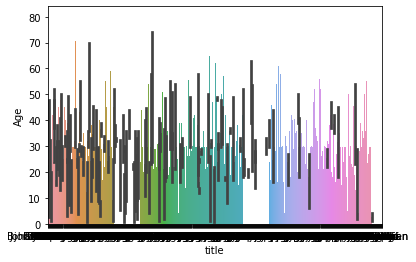

In [53]:

sns.barplot(df['title'],df['Age'])

In [54]:
m=df['Name'].str.split('.',expand=True)
df['title']=m[0]
df['Name']=m[1]
df['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Dr', 'Major', 'Don', 'Master', 'Rev', 'Col',
       'Mlle', 'Lady', 'Jonkheer', 'Mme', 'Sir', 'Capt', 'the Countess',
       'Ms'], dtype=object)

In [55]:
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                      "Dr":         "Officer",
                    "Rev":        "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                   "Lady" :      "Royalty",
                  "the Countess": "Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Miss",
                    "Mlle":       "Miss",
                    "Miss" :      "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mrs",
                    "Mrs" :       "Mrs",
                    "Master" :    "Master"
                   }
df['title'].replace(Title_Dictionary,inplace=True)

In [56]:
df


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
0,No,2,Erik Gustaf,male,28.000000,0,0,248740,13.0000,S,Mrs
1,No,3,Sigurd Hansen,male,25.000000,0,0,348123,7.6500,S,Mrs
2,No,3,Hans Peder,male,20.000000,0,0,350050,7.8542,S,Mrs
3,No,3,Nils (Alma Cornelia Berglund),female,29.000000,0,4,349909,21.0750,S,Mrs
4,No,1,Thornton,male,31.000000,1,0,F.C. 12750,52.0000,S,Mrs
5,No,3,Anders Vilhelm,male,37.000000,2,0,3101276,7.9250,S,Mrs
6,No,3,George,male,19.000000,0,0,358585,14.5000,S,Mrs
7,Yes,3,"Maria (""Mary"")",female,1.000000,0,2,2653,15.7417,C,Miss
8,No,3,"John Hall (""Henry"")",male,20.500000,0,0,A/5 21173,7.2500,S,Mrs
9,Yes,2,Charles Alexander (Alice Adelaide Slow),female,42.000000,1,0,SC/AH 3085,26.0000,S,Mrs


In [57]:
df.iloc[25:35]


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
25,No,2,Jacob Christian,male,48.000000,0,0,234360,13.0000,S,Mrs
26,Yes,1,Maxmillian,male,60.000000,1,1,13567,79.2000,C,Mrs
27,Yes,1,Henry William,male,50.000000,2,0,PC 17611,133.6500,S,Officer
28,No,3,Francesco,male,24.000000,0,0,343275,8.0500,S,Mrs
29,No,3,Malake,female,17.000000,0,0,2627,14.4583,C,Miss
30,No,3,William Thomas,male,19.000000,0,0,323951,8.0500,S,Mrs
31,No,2,Kurt Arnold Gottfrid,male,25.000000,1,0,236853,26.0000,S,Mrs
32,No,1,John,male,29.699118,0,0,PC 17483,221.7792,S,Mrs
33,No,1,Archibald Willingham,male,45.000000,0,0,113050,26.5500,S,Officer
34,Yes,2,Peter Henry (Lillian Jefferys),female,30.000000,3,0,31027,21.0000,S,Mrs


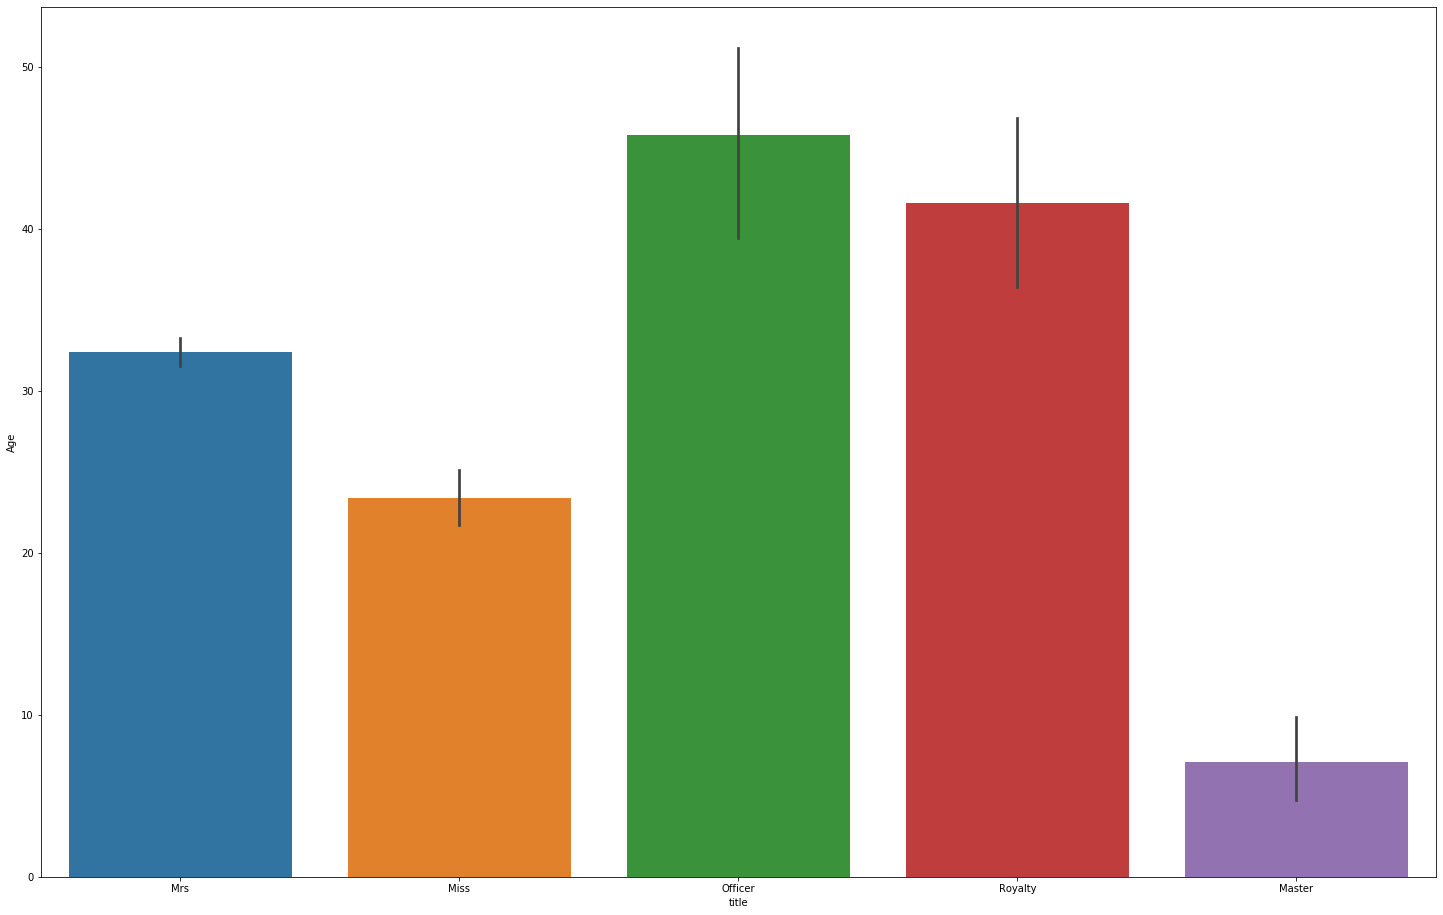

In [58]:
plt.figure(figsize=(25,16))
sns.barplot(x=df['title'], y=df['Age'])

In [59]:
df["familysize"]=df['SibSp']+df['Parch']

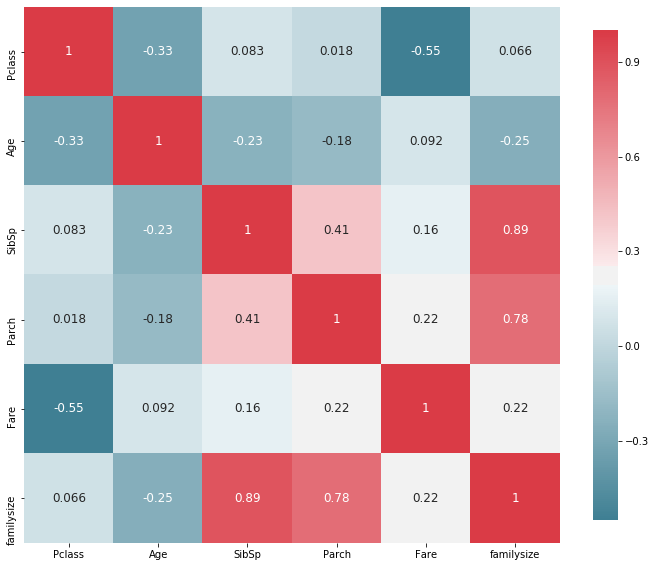

In [60]:
plot_correlation_map( df )


In [61]:
df.groupby(['title','familysize']).mean()

Pclass        Age     SibSp     Parch        Fare
title   familysize                                                     
Master  1           3.000000   6.140000  0.333333  0.666667   10.744467
        2           2.333333   7.181882  0.733333  1.266667   25.504160
        3           1.750000   3.480000  1.250000  1.750000   82.781250
        4           3.000000  15.849559  3.000000  1.000000   23.270850
        5           3.000000   5.000000  3.777778  1.222222   32.373611
        6           3.000000   5.333333  4.000000  2.000000   31.350000
        7           3.000000   7.000000  5.000000  2.000000   46.900000
        10          3.000000  29.699118  8.000000  2.000000   69.550000
Miss    0           2.262136  28.052239  0.000000  0.000000   38.998910
        1           2.185185  22.048017  0.592593  0.407407   41.007415
        2           2.181818  16.595334  0.545455  1.454545   36.150564
        3           2.200000   8.819912  1.400000  1.600000   52.610410
        4           2.555556  18.788595  2.555556  1.444444   79.116678
        5           2.000000  14.500000  3.000000  2.000000  145.450000
        6           3.000000   8.333333  4.000000  2.000000   27.402083
        7           3.000000  16.000000  5.000000  2.000000   46.900000
        10          3.000000  29.699118  8.000000  2.000000   69.550000
Mrs     0           2.473684  32.030868  0.000000  0.000000   16.712228
        1           1.850394  33.260505  0.811024  0.188976   53.055054
        2           2.274194  33.093491  0.983871  1.016129   41.550135
        3           2.066667  30.046608  1.333333  1.666667   48.922780
        4           2.750000  36.750000  0.750000  3.250000   28.206250
        5           2.444444  33.555556  1.777778  3.222222   83.193056
        6           3.000000  38.666667  1.000000  5.000000   31.312500
        7           3.000000  28.500000  3.000000  4.000000   46.900000
        10          3.000000  29.699118  8.000000  2.000000   69.550000
Officer 0           1.461538  44.438394  0.000000  0.000000   22.346477
        1           2.000000  41.000000  0.500000  0.500000   29.500000
        2           1.000000  54.666667  1.666667  0.333333   98.216667
Royalty 0           1.000000  37.000000  0.000000  0.000000   38.073600
        1           1.000000  48.500000  1.000000  0.000000   48.264600

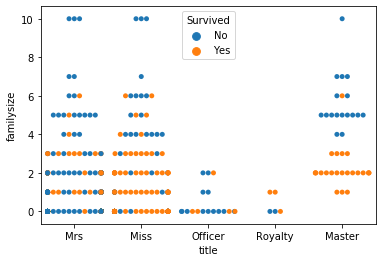

In [62]:
sns.swarmplot( y=df['familysize'],x=df['title'],hue=df['Survived'])

In [63]:
we can see thant the most survivers were miss that theire familysize were between 0 and 3 or master that their family size were
between 1 and 3 . So this feature is usefull

SyntaxError: invalid syntax (<ipython-input-63-40b2028c1358>, line 1)

In [64]:
df['Survived']=df['Survived'].map({'Yes':1,'No':0})
df['Sex']=df['Sex'].map({'male':1,'female':0})
df['title']=df['title'].map({'Mrs':1,'Master':2,'Miss':3,'Officer':4,'Royalty':5})
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title,familysize
0,0,2,Erik Gustaf,1,28.0,0,0,248740,13.0000,S,1,0
1,0,3,Sigurd Hansen,1,25.0,0,0,348123,7.6500,S,1,0
2,0,3,Hans Peder,1,20.0,0,0,350050,7.8542,S,1,0
3,0,3,Nils (Alma Cornelia Berglund),0,29.0,0,4,349909,21.0750,S,1,4
4,0,1,Thornton,1,31.0,1,0,F.C. 12750,52.0000,S,1,1


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
x=df[["familysize", "Sex", "title"]]
y=df["Survived"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) 
logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)   
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.78


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


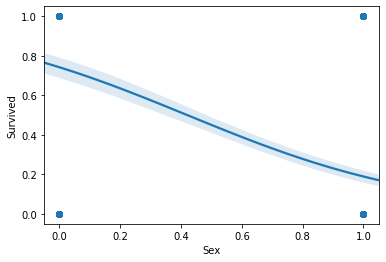

In [68]:
import seaborn as sns
sns.regplot(x='Sex',y='Survived',data=df,logistic=True)

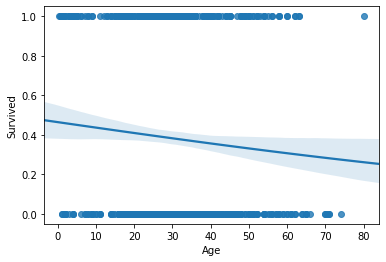

In [69]:
import seaborn as sns
sns.regplot(x='Age',y='Survived',data=df,logistic=True)

In [71]:
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['actual'],colnames=['predicted'])
print(confusion_matrix)

predicted    0   1
actual            
0          157  32
1           38  85


In [73]:
 Accuracy = (157+85)/(157+32+38+85)
print(Accuracy)

0.7756410256410257


In [75]:
Recall = 157/(157+38)
print(Recall)

0.8051282051282052


In [76]:
Precision= 157/(157+32)
print(Precision)

0.8306878306878307


In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       189
           1       0.73      0.69      0.71       123

    accuracy                           0.78       312
   macro avg       0.77      0.76      0.76       312
weighted avg       0.77      0.78      0.77       312

